In [1]:
import cv2
import os
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display

In [40]:
index = ["number_of_matches", "noise_std"]

In [41]:
df = pd.read_csv("results.csv", index_col = index)

In [42]:
df

Basic Stitching  Simple Graph Stitching  \
number_of_matches noise_std                                            
1                 0.00              2.897775            4.025170e-16   
                  0.04              2.839618            9.681395e-01   
                  0.08              2.960060            2.172362e+00   
                  0.12              2.682019            3.866670e+00   
                  0.16              3.167270            6.933311e+00   
                  0.20              3.675739            1.220441e+02   
                  0.24              4.011198            2.833376e+00   
5                 0.00              2.897775            4.025170e-16   
                  0.04              2.798592            6.412049e-01   
                  0.08              3.136490            3.869145e-01   
                  0.12              3.098488            4.211655e+00   
                  0.16              3.389239            1.807240e+00   
                  0.20              3.077196            3.631938e+00   
                  0.24              3.274900            3.914421e+01   
10                0.00              2.897775            4.025170e-16   
                  0.04              2.813509            3.901479e-01   
                  0.08              2.981047            3.977906e+00   
                  0.12              2.978010            8.142663e+00   
                  0.16              3.027260            5.152711e+00   
                  0.20              3.855605            8.618677e+00   
                  0.24              3.813125            1.150644e+00   
15                0.00              2.897775            4.025170e-16   
                  0.04              2.884802            5.796154e-01   
                  0.08              2.933673            9.907342e-01   
                  0.12              2.958957            7.633926e-01   
                  0.16              2.852883            3.564836e+00   
                  0.20              3.297558            1.273477e+01   
                  0.24              4.409866            2.962301e+00   
20                0.00              2.897775            4.025170e-16   
                  0.04              2.980195            1.025142e+01   
                  0.08              2.985388            8.525309e-01   
                  0.12              3.085622            2.523174e+00   
                  0.16              2.460405            2.283734e+00   
                  0.20              4.086070            8.406353e-01   
                  0.24              3.106441            4.013760e+00   
25                0.00              2.897775            4.025170e-16   
                  0.04              2.895615            8.212692e-01   
                  0.08              2.877081            5.931968e-01   
                  0.12              2.961480            8.870364e-01   
                  0.16              3.424477            1.033486e+00   
                  0.20              3.057862            5.273986e+00   
                  0.24              3.112373            1.838385e+03   
30                0.00              2.897775            4.025170e-16   
                  0.04              2.873138            1.035864e+00   
                  0.08              2.761667            8.644695e+00   
                  0.12              3.409413            3.223991e+00   
                  0.16              3.144719            3.134986e+00   
                  0.20              2.798895            3.030743e+01   
                  0.24              3.323781            1.841197e+00   

                             Edge Averaging Stitching  Multi-Graph Stitching  \
number_of_matches noise_std                                                    
1                 0.00                   4.025170e-16           4.113208e-14   
                  0.04                   9.681395e-01           9.681395e-01   
                  0.08              

In [43]:
df_v = df.drop(columns="Experiments")

In [44]:
df_v

Basic Stitching  Simple Graph Stitching  \
number_of_matches noise_std                                            
1                 0.00              2.897775            4.025170e-16   
                  0.04              2.839618            9.681395e-01   
                  0.08              2.960060            2.172362e+00   
                  0.12              2.682019            3.866670e+00   
                  0.16              3.167270            6.933311e+00   
                  0.20              3.675739            1.220441e+02   
                  0.24              4.011198            2.833376e+00   
5                 0.00              2.897775            4.025170e-16   
                  0.04              2.798592            6.412049e-01   
                  0.08              3.136490            3.869145e-01   
                  0.12              3.098488            4.211655e+00   
                  0.16              3.389239            1.807240e+00   
                  0.20              3.077196            3.631938e+00   
                  0.24              3.274900            3.914421e+01   
10                0.00              2.897775            4.025170e-16   
                  0.04              2.813509            3.901479e-01   
                  0.08              2.981047            3.977906e+00   
                  0.12              2.978010            8.142663e+00   
                  0.16              3.027260            5.152711e+00   
                  0.20              3.855605            8.618677e+00   
                  0.24              3.813125            1.150644e+00   
15                0.00              2.897775            4.025170e-16   
                  0.04              2.884802            5.796154e-01   
                  0.08              2.933673            9.907342e-01   
                  0.12              2.958957            7.633926e-01   
                  0.16              2.852883            3.564836e+00   
                  0.20              3.297558            1.273477e+01   
                  0.24              4.409866            2.962301e+00   
20                0.00              2.897775            4.025170e-16   
                  0.04              2.980195            1.025142e+01   
                  0.08              2.985388            8.525309e-01   
                  0.12              3.085622            2.523174e+00   
                  0.16              2.460405            2.283734e+00   
                  0.20              4.086070            8.406353e-01   
                  0.24              3.106441            4.013760e+00   
25                0.00              2.897775            4.025170e-16   
                  0.04              2.895615            8.212692e-01   
                  0.08              2.877081            5.931968e-01   
                  0.12              2.961480            8.870364e-01   
                  0.16              3.424477            1.033486e+00   
                  0.20              3.057862            5.273986e+00   
                  0.24              3.112373            1.838385e+03   
30                0.00              2.897775            4.025170e-16   
                  0.04              2.873138            1.035864e+00   
                  0.08              2.761667            8.644695e+00   
                  0.12              3.409413            3.223991e+00   
                  0.16              3.144719            3.134986e+00   
                  0.20              2.798895            3.030743e+01   
                  0.24              3.323781            1.841197e+00   

                             Edge Averaging Stitching  Multi-Graph Stitching  \
number_of_matches noise_std                                                    
1                 0.00                   4.025170e-16           4.113208e-14   
                  0.04                   9.681395e-01           9.681395e-01   
                  0.08              

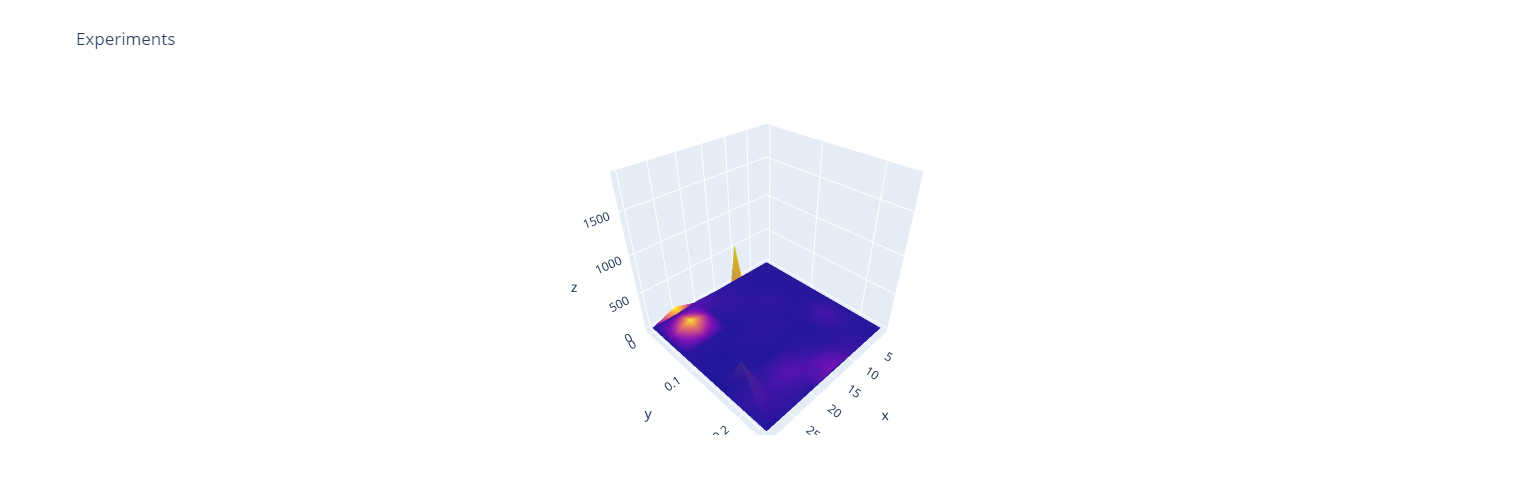

In [47]:
import plotly.graph_objects as go
import numpy as np

x = np.unique([ v[0] for v in df_v.index.values])
y = np.unique([ v[1] for v in df_v.index.values])

data = [ go.Surface(x=x, y=y, z=df_v.loc[:,c].values.reshape((x.shape[0],y.shape[0])), showscale=False, opacity=0.9) for c in df_v.columns ] 

fig = go.Figure(data=data)

fig.update_layout(title='Experiments', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()